In [18]:
import scipy.io as sio
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

In [19]:
mat = sio.loadmat("Data/noisyecg.mat")

ecg3 = mat['ecg3']
ecgData=ecg3[0]

In [20]:
DataLength= ecgData.size
freq = np.arange(ecgData.size)
fs = 500 # sample Frequency rate
tstep=1/DataLength
N=int(DataLength/fs)
fstep=DataLength/N
f=np.linspace(0,(N-1)*fstep,DataLength)

time = DataLength / fs # Time recorded
t=np.linspace(0,N,DataLength)
#f=np.linspace(0,fstep,nsample)



#X_mag=np.abs(X)/nsample
frequencies = np.fft.fftfreq(len(ecgData), d=1/fs)
fft_X=frequencies[:len(ecgData)]
fft_X=abs(fft_X)

Y =np.fft.fft(ecgData)
fft_Y=np.abs(Y)/N


Check :[0.   0.05 0.1  ... 0.15 0.1  0.05]


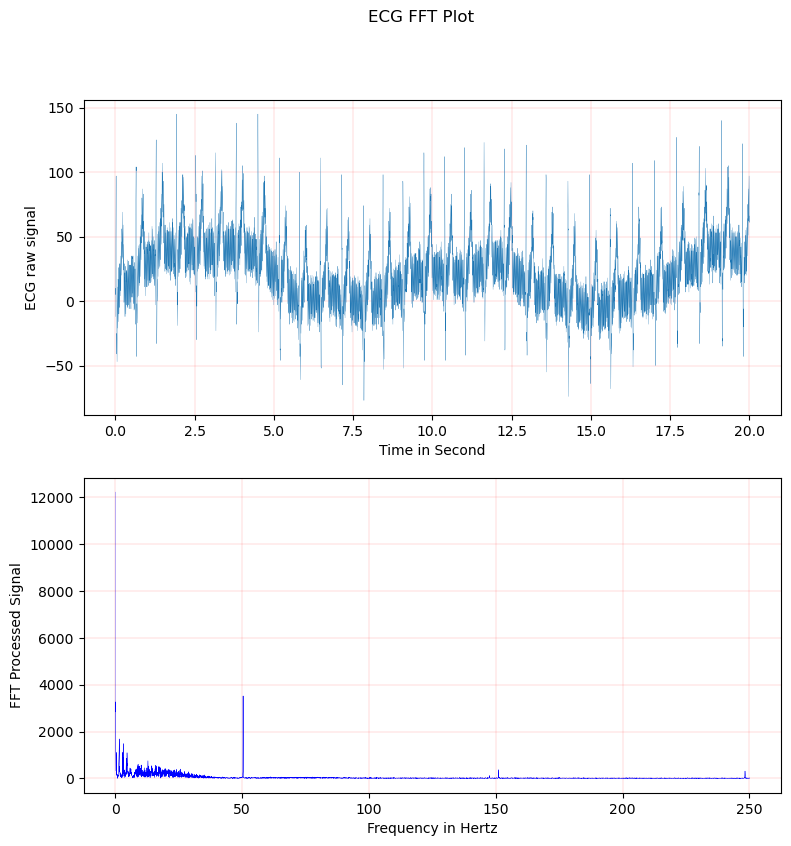

In [21]:

print("Check :" + str(fft_X))

# Plot ECG
fig, [ax1,ax2] =plt.subplots(2,1)

fig.suptitle("ECG FFT Plot")
ax1.plot(t,ecgData,linewidth=0.2)
ax2.plot(fft_X, fft_Y, color='blue',linewidth=0.2)
fig.set_figheight(9)
fig.set_figwidth(9)
ax1.set_ylabel("ECG raw signal")
ax2.set_ylabel("FFT Processed Signal")
ax1.set_xlabel("Time in Second")
ax2.set_xlabel("Frequency in Hertz")
ax1.grid(color = 'red',linewidth=0.1)
ax2.grid(color = 'red',linewidth=0.1)

plt.show()

In [22]:
import scipy.signal as sig

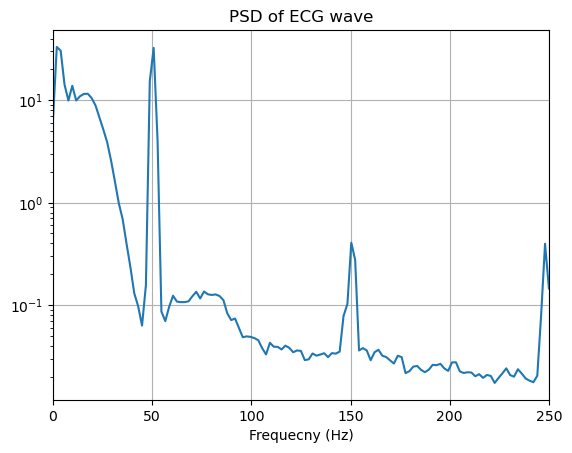

In [23]:
f, Pxx_ecgData = sig.welch(ecgData, fs)

plt.semilogy(f, Pxx_ecgData)
# plt.stem(f, Pxx_den)

plt.title('PSD of ECG wave')
plt.xlabel('Frequecny (Hz)')
plt.grid()
plt.xlim([0, fs/2])
plt.show()

## BUTTERWORTH 47,53 bandstop filter

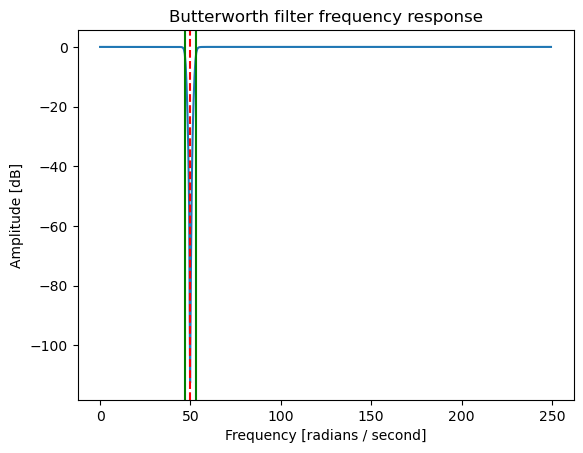

In [24]:
b, a = sig.butter(4, [47,53], 'bandstop', fs=fs, output='ba')
# b, a = signal.butter(4, 30, 'highpass', fs=fs, output='ba')

w, h = sig.freqz(b, a, fs=fs) #omega
plt.plot(w , 20 * np.log10(abs(h)))

plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.axvline(47, color='green') # cutoff frequency
plt.axvline(50, color='red', linestyle='--') # cutoff frequency
plt.axvline(53, color='green') # cutoff frequency
plt.show()

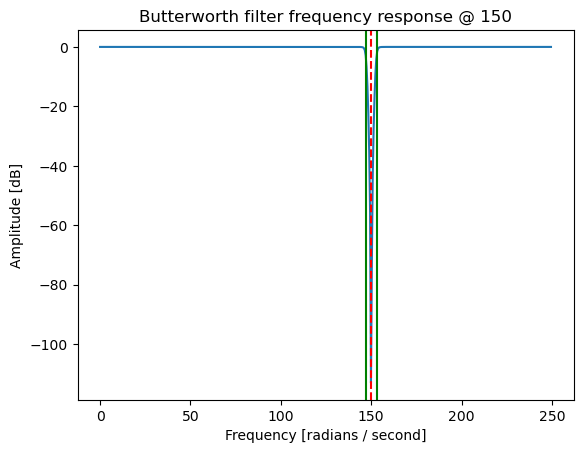

In [25]:
b2, a2 = sig.butter(4, [147,153], 'bandstop', fs=fs, output='ba')
# b, a = signal.butter(4, 30, 'highpass', fs=fs, output='ba')

w2, h2 = sig.freqz(b2, a2, fs=fs) #omega
plt.plot(w2 , 20 * np.log10(abs(h2)))

plt.title('Butterworth filter frequency response @ 150')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.axvline(147, color='green') # cutoff frequency
plt.axvline(150, color='red', linestyle='--') # cutoff frequency
plt.axvline(153, color='green') # cutoff frequency
plt.show()

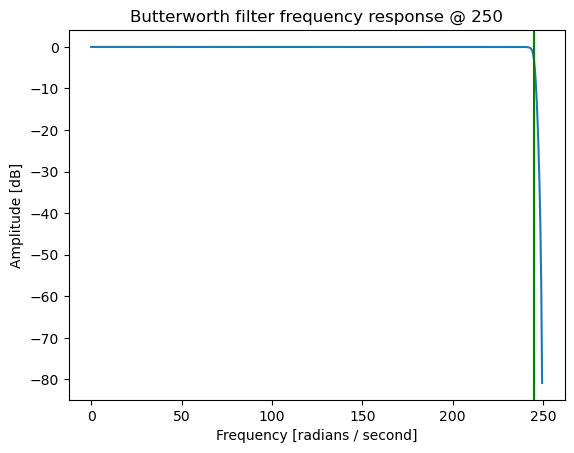

In [26]:
b3, a3 = sig.butter(4, 245, 'lowpass', fs=fs, output='ba')
# b, a = signal.butter(4, 30, 'highpass', fs=fs, output='ba')

w3, h3 = sig.freqz(b3, a3, fs=fs) #omega
plt.plot(w3 , 20 * np.log10(abs(h3)))

plt.title('Butterworth filter frequency response @ 250')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.axvline(245, color='green') # cutoff frequency
#plt.axvline(249, color='red', linestyle='--') # cutoff frequency
#plt.axvline(249, color='green') # cutoff frequency
plt.show()

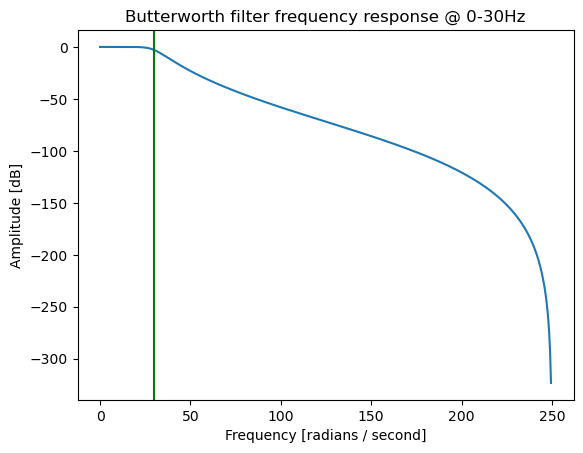

In [40]:
b4, a4 = sig.butter(5, 30, 'lowpass', output='ba', fs=fs)
# b, a = signal.butter(4, 30, 'highpass', fs=fs, output='ba')
w4, h4 = sig.freqz(b4, a4, fs=fs) #omega
plt.plot(w4 , 20 * np.log10(abs(h4)))

plt.title('Butterworth filter frequency response @ 0-30Hz')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.axvline(30, color='green') # cutoff frequency
# plt.axvline(150, color='red', linestyle='--') # cutoff frequency
# plt.axvline(153, color='green') # cutoff frequency
plt.show()

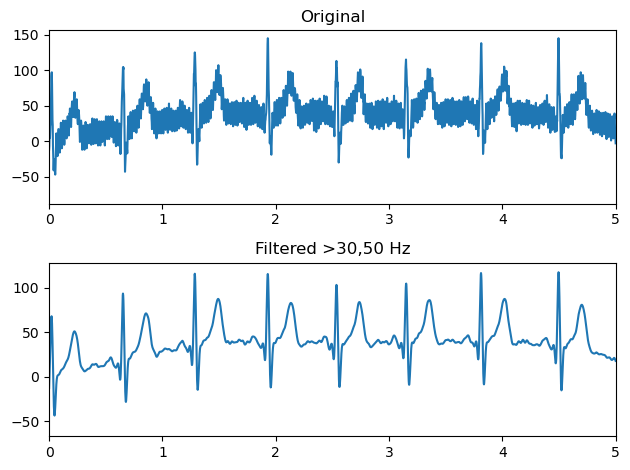

In [46]:
# Apply butterworth filter
filtered_signal = sig.filtfilt(b,a, ecgData)
filtered_signal4=sig.filtfilt(b4,a4,ecgData)
plt.subplot(211)
plt.title('Original')
plt.xlim([0,5])
plt.plot(t, ecgData)

plt.subplot(212)
plt.title('Filtered >30 Hz')
plt.plot(t, filtered_signal4)
plt.xlim([0,5])
plt.tight_layout()
plt.show()

In [44]:
frequencies = np.fft.fftfreq(len(filtered_signal4), d=1/fs)
filt_fft_X=frequencies[:len(filtered_signal4)]
filt_fft_X=abs(filt_fft_X)

filt_Y =np.fft.fft(filtered_signal4)
filt_fft_Y=np.abs(filt_Y)/N

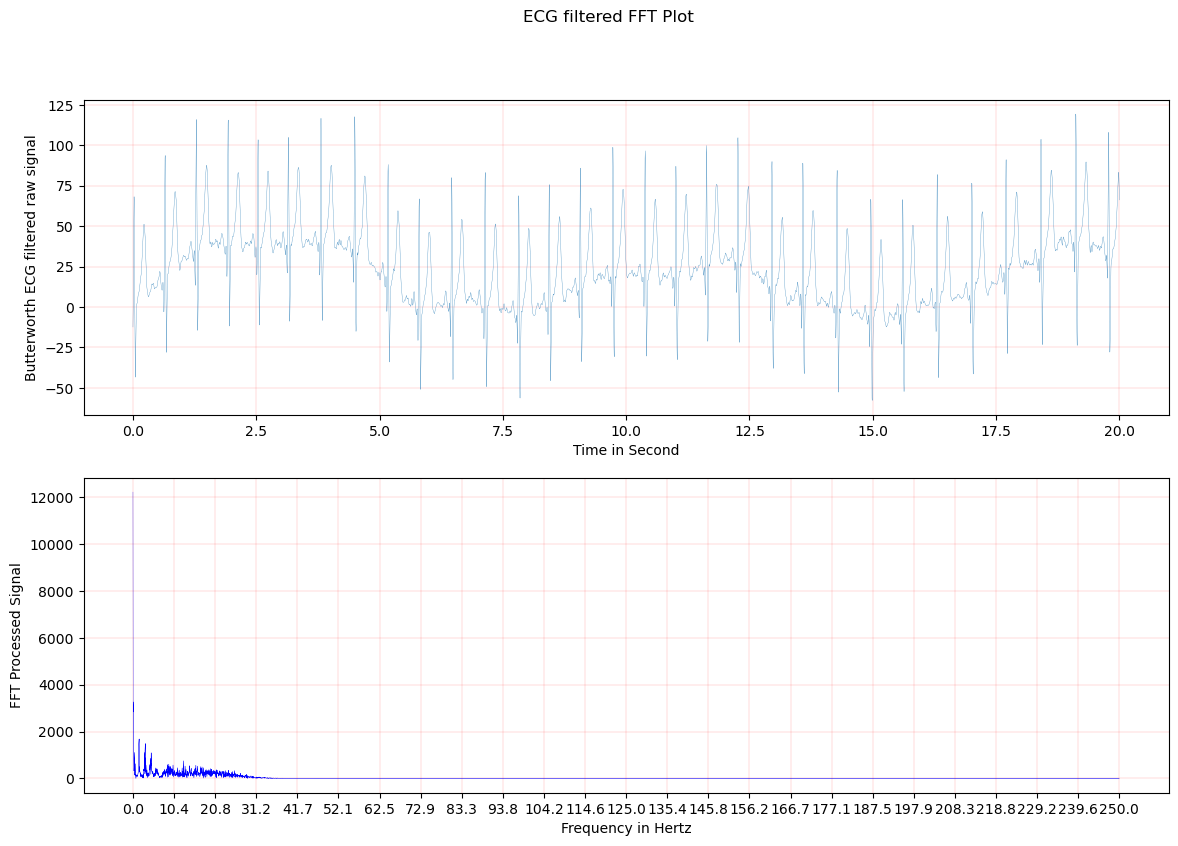

In [49]:
fig, [ax1,ax2] =plt.subplots(2,1)

fig.suptitle("ECG filtered FFT Plot")
ax1.plot(t,filtered_signal4,linewidth=0.2)
ax2.plot(filt_fft_X, filt_fft_Y, color='blue',linewidth=0.2)
fig.set_figheight(9)
fig.set_figwidth(14)
ax1.set_ylabel("Butterworth ECG filtered raw signal")
ax2.set_ylabel("FFT Processed Signal")
ax1.set_xlabel("Time in Second")
ax2.set_xlabel("Frequency in Hertz")

ticks10=np.linspace(0,250,25)

ax1.grid(color = 'red',linewidth=0.1)
ax2.grid(color = 'red',linewidth=0.1)
ax2.set_xticks(ticks10)

plt.show()

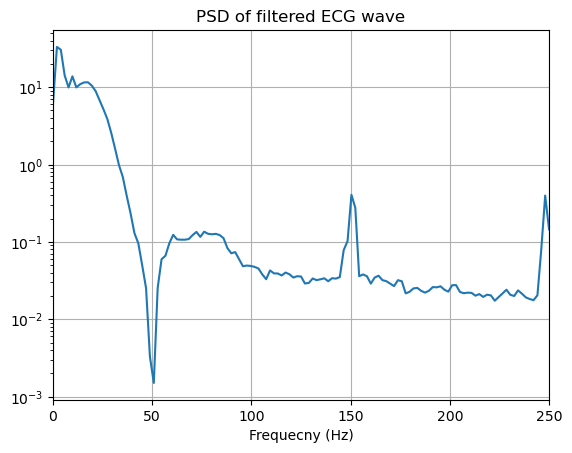

In [31]:
f, Pxx_filt_ecgData = sig.welch(filtered_signal, fs)

plt.semilogy(f, Pxx_filt_ecgData)
# plt.stem(f, Pxx_den)

plt.title('PSD of filtered ECG wave')
plt.xlabel('Frequecny (Hz)')
plt.grid()
plt.xlim([0, fs/2])
plt.show()

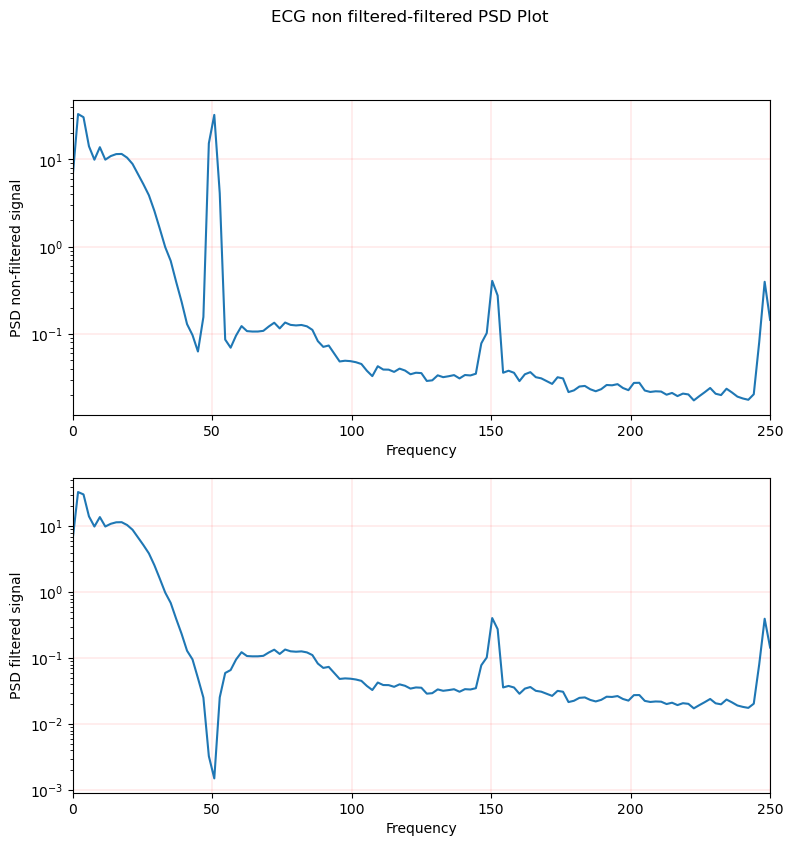

In [32]:
fig, [ax1,ax2] =plt.subplots(2,1)

fig.suptitle("ECG non filtered-filtered PSD Plot")
ax1.semilogy(f, Pxx_ecgData)
ax2.semilogy(f, Pxx_filt_ecgData)
fig.set_figheight(9)
fig.set_figwidth(9)
ax1.set_ylabel("PSD non-filtered signal")
ax2.set_ylabel("PSD filtered signal")
ax1.set_xlabel("Frequency")
ax2.set_xlabel("Frequency")
ax1.set_xlim([0,fs/2])
ax2.set_xlim([0,fs/2])
ax1.grid(color = 'red',linewidth=0.1)
ax2.grid(color = 'red',linewidth=0.1)

plt.show()

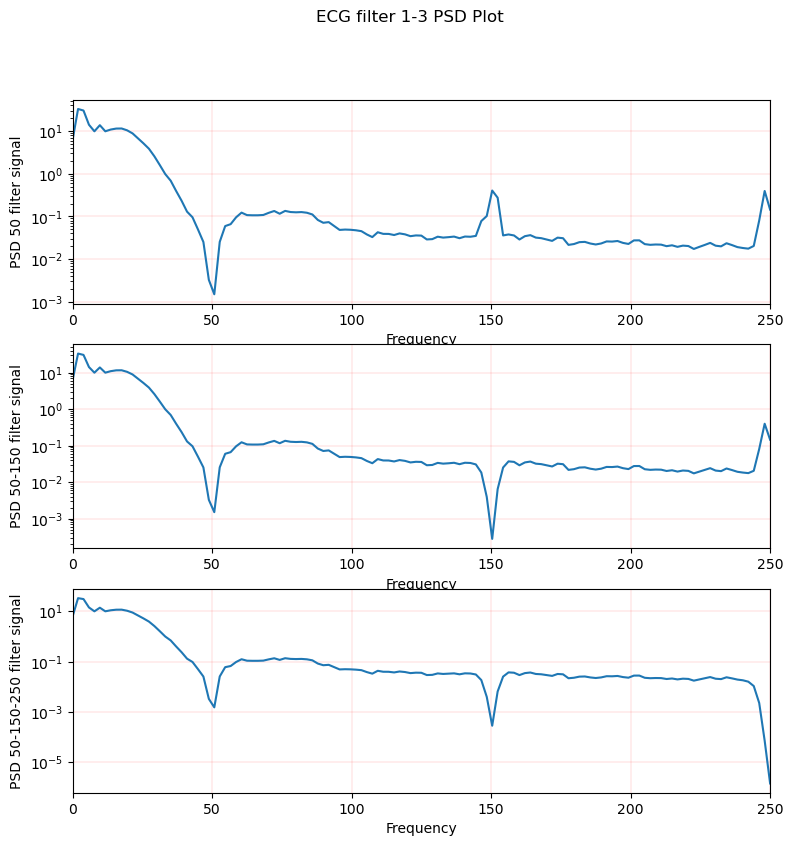

In [33]:
# Apply butterworth filter
filtered_signal2 = sig.filtfilt(b2,a2, filtered_signal)
filtered_signal3 = sig.filtfilt(b3,a3, filtered_signal2)

f, Pxx_filt2_ecgData = sig.welch(filtered_signal2, fs) #PSD of 50-150
f, Pxx_filt3_ecgData = sig.welch(filtered_signal3, fs) #PSD of 50-150-250

fig, [ax1,ax2,ax3] =plt.subplots(3,1)

fig.suptitle("ECG filter 1-3 PSD Plot")
ax1.semilogy(f, Pxx_filt_ecgData)
ax2.semilogy(f, Pxx_filt2_ecgData)
ax3.semilogy(f, Pxx_filt3_ecgData)
fig.set_figheight(9)
fig.set_figwidth(9)
ax1.set_ylabel("PSD 50 filter signal")
ax2.set_ylabel("PSD 50-150 filter signal")
ax3.set_ylabel("PSD 50-150-250 filter signal")
ax1.set_xlabel("Frequency")
ax2.set_xlabel("Frequency")
ax3.set_xlabel("Frequency")
ax1.set_xlim([0,fs/2])
ax2.set_xlim([0,fs/2])
ax3.set_xlim([0,fs/2])
ax1.grid(color = 'red',linewidth=0.1)
ax2.grid(color = 'red',linewidth=0.1)
ax3.grid(color = 'red',linewidth=0.1)
plt.show()

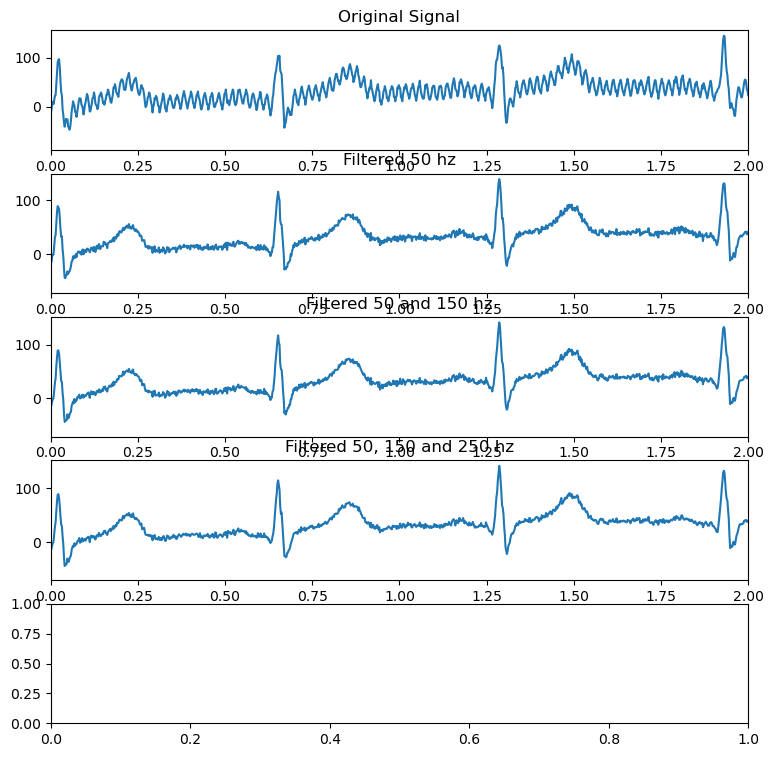

In [34]:
fig, axs = plt.subplots(5, 1)

axs[0].plot(t, ecgData)
axs[0].set_title("Original Signal")
axs[0].set_xlim([0,2])

axs[1].plot(t, filtered_signal)
axs[1].set_title("Filtered 50 hz")
axs[1].set_xlim([0,2])

axs[2].plot(t, filtered_signal2)
axs[2].set_title("Filtered 50 and 150 hz")
axs[2].set_xlim([0,2])

axs[3].plot(t, filtered_signal3)
axs[3].set_title("Filtered 50, 150 and 250 hz")
axs[3].set_xlim([0,2])

fig.set_figheight(9)
fig.set_figwidth(9)
plt.show()

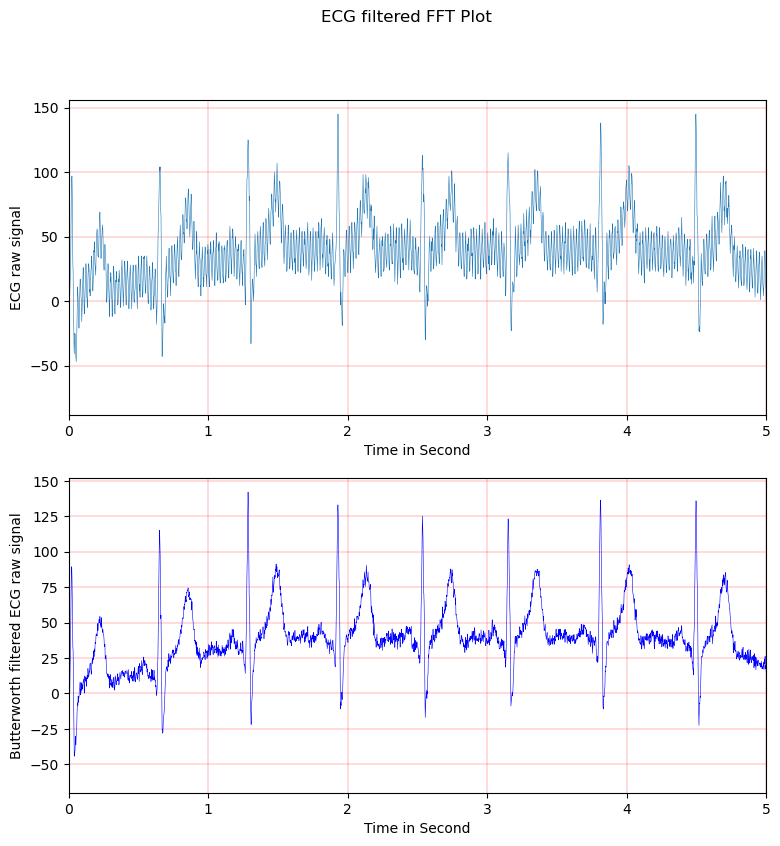

In [35]:
fig, [ax1,ax2] =plt.subplots(2,1)

x_limiter=5

fig.suptitle("ECG filtered FFT Plot")
ax1.plot(t, ecgData,linewidth=0.4)
ax1.set_ylabel("ECG raw signal")
ax1.set_xlabel("Time in Second")
ax1.grid(color = 'red',linewidth=0.2)
ax1.set_xlim([0,x_limiter])

ax2.plot(t, filtered_signal3, color='blue',linewidth=0.4)
ax2.set_ylabel("Butterworth filtered ECG raw signal")
ax2.set_xlabel("Time in Second")
ax2.grid(color = 'red',linewidth=0.2)
ax2.set_xlim([0,x_limiter])

fig.set_figheight(9)
fig.set_figwidth(9)

plt.show()